# Dixon Coles Model, no time dependence

The time dependence of the full model is hard to implement, so this one has the tau correction term.

In [1]:
from modeling import *
from plotting import *
from predictions import predict_outcomes_dixon_coles, predict_outcomes_dixon_coles_et
from data import get_data, cut_data
import arviz as az
from arviz import hdi
import pickle
import seaborn as sns
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
from scipy.stats import poisson
import pandas as pd
from itertools import product
from pystan import check_hmc_diagnostics
from pystan.experimental import unpickle_fit
from collections import defaultdict

INFO:numexpr.utils:Note: NumExpr detected 24 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
model = compile_or_load('stan/dixon_coles_no_td.stan')

In [3]:
data = cut_data(get_data(), '2018-01-01')
stan_data = prepare_stan_data(data)
countries = get_country_list(data)

In [4]:
with open('tmp_fit.pic', 'rb') as f:
    fit = pickle.load(f)['fit']

In [7]:
#fit = model.sampling(stan_data, iter=3000, control={'max_treedepth': 12})




Gradient evaluation took 0.002055 seconds
1000 transitions using 10 leapfrog steps per transition would take 20.55 seconds.
Adjust your expectations accordingly!


Gradient evaluation took 0.002087 seconds
Gradient evaluation took 0.002066 seconds
1000 transitions using 10 leapfrog steps per transition would take 20.66 seconds.
1000 transitions using 10 leapfrog steps per transition would take 20.87 seconds.
Adjust your expectations accordingly!


Adjust your expectations accordingly!



Gradient evaluation took 0.00181 seconds
1000 transitions using 10 leapfrog steps per transition would take 18.1 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 3000 [  0%]  (Warmup)
Iteration:    1 / 3000 [  0%]  (Warmup)
Iteration:    1 / 3000 [  0%]  (Warmup)
Iteration:    1 / 3000 [  0%]  (Warmup)
Iteration:  300 / 3000 [ 10%]  (Warmup)
Iteration:  300 / 3000 [ 10%]  (Warmup)
Iteration:  300 / 3000 [ 10%]  (Warmup)
Iteration:  300 / 3000 [ 10%]  (Warmup)
Iteration:  600 / 3000

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


with open('tmp_fit.pic', 'wb') as f:
    pickle.dump({'model': model, 'fit': fit}, f, -1)

In [5]:
chains = fit.extract()

In [6]:
home_advantage = chains['home_advantage']
intercept = chains['intercept']
rho = chains['rho']

/home/lukas/miniconda3/envs/bafeg_clean/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lukas/miniconda3/envs/bafeg_clean/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


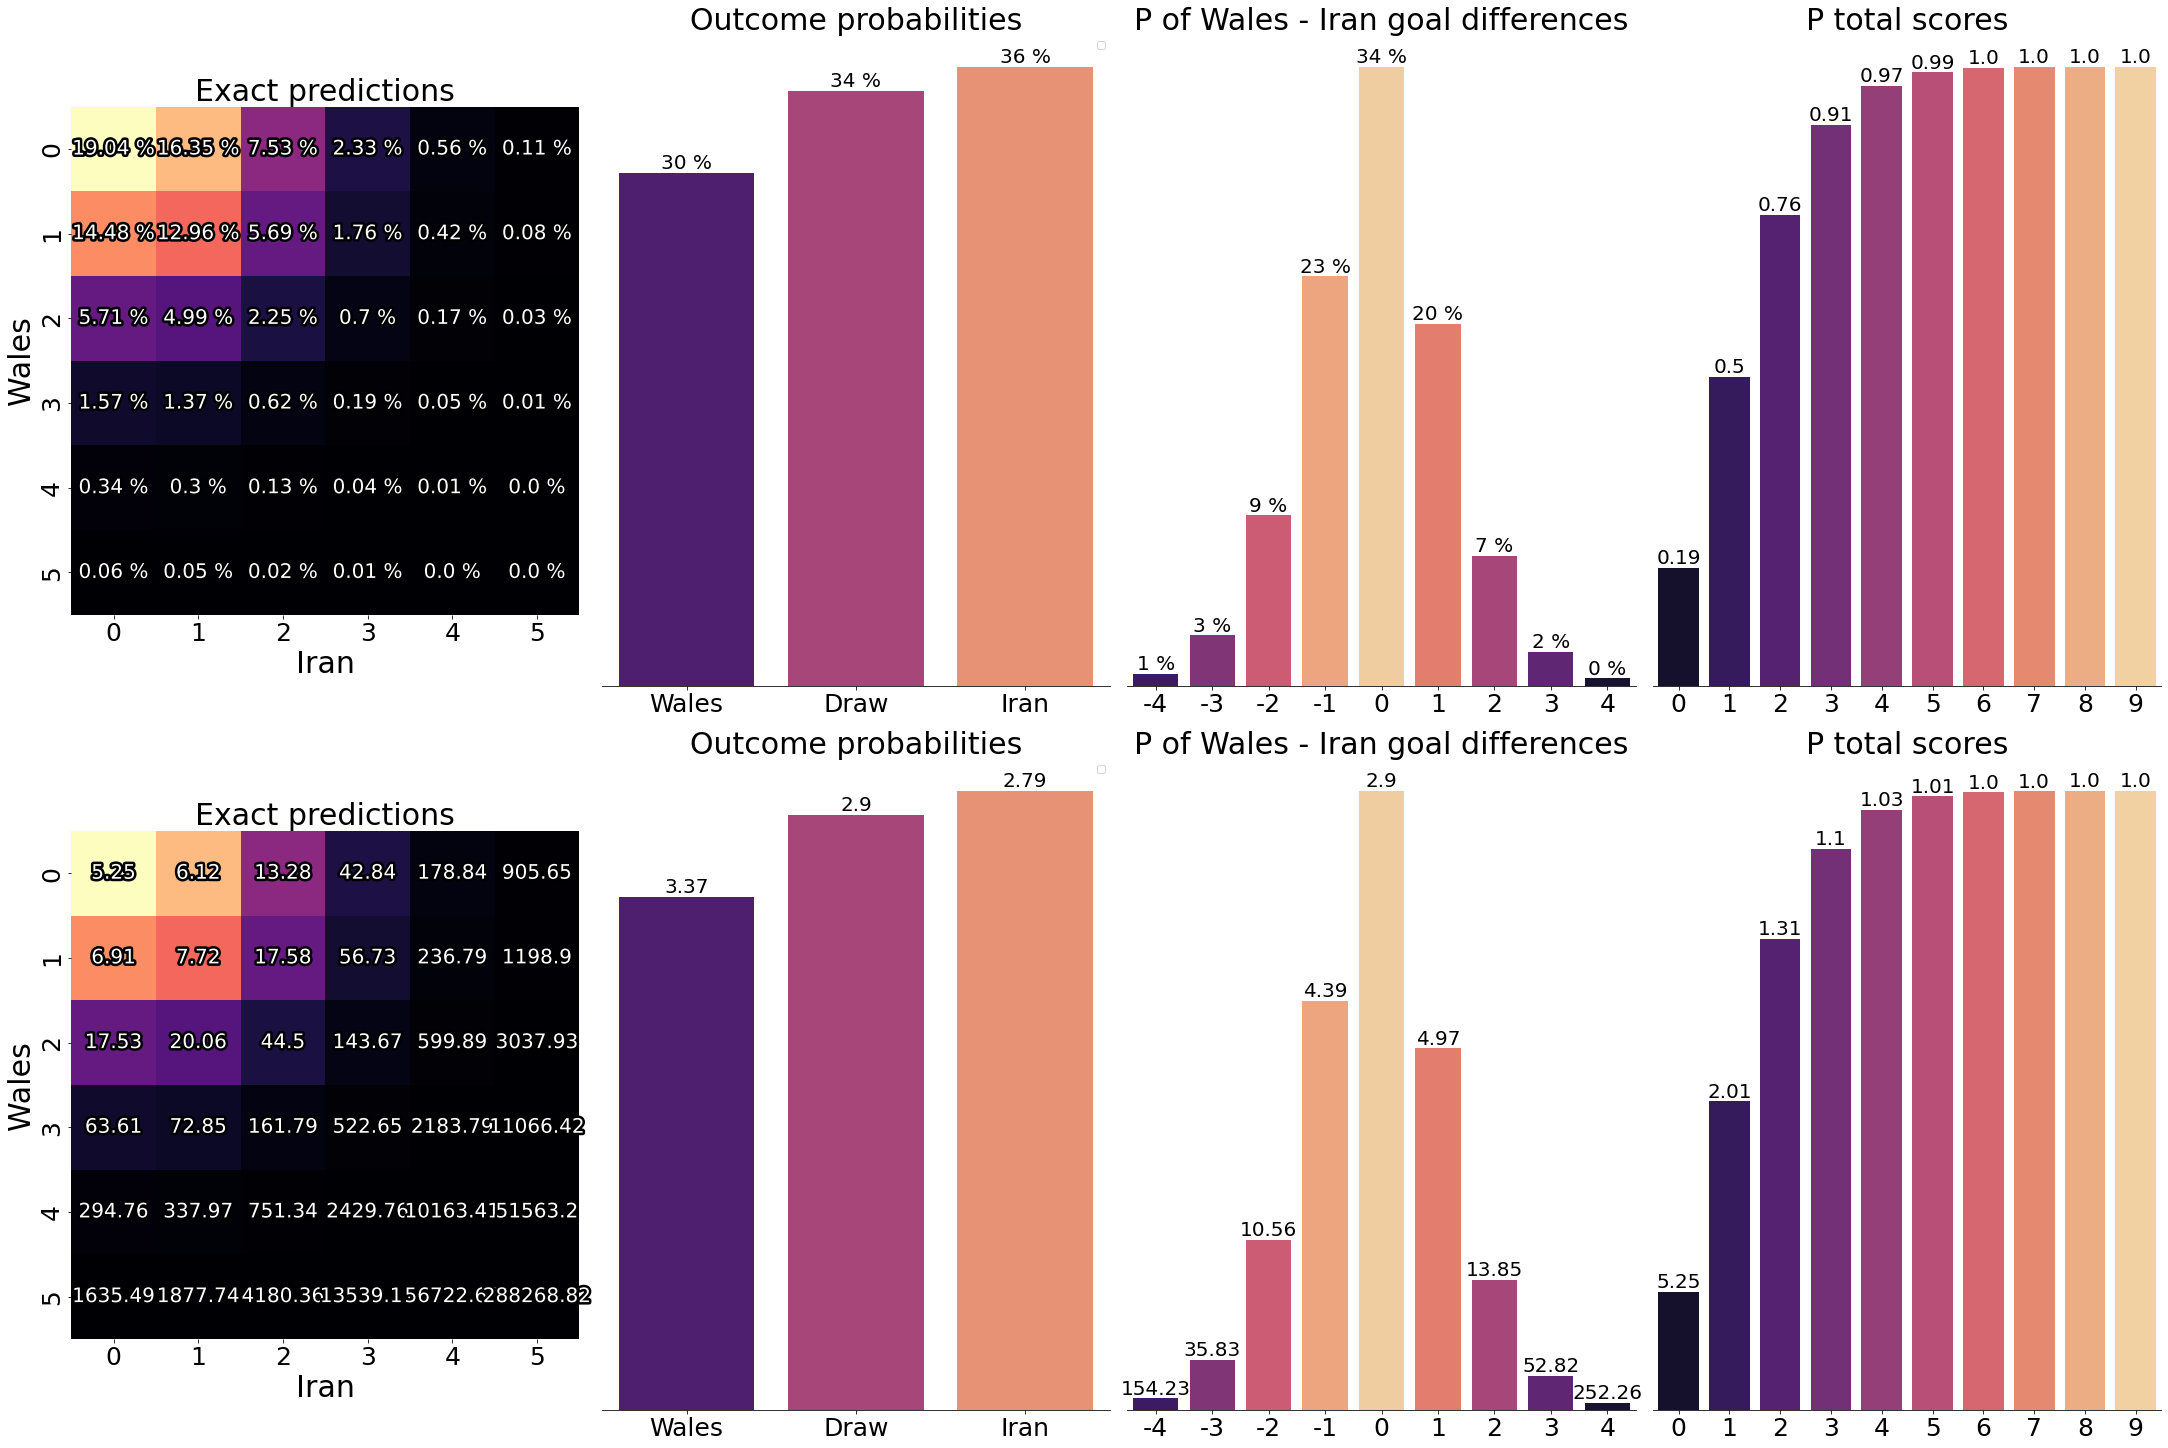

In [7]:
home_team = 'Wales'
away_team = 'Iran'
location = 'Qatar'
home_idx = country_to_idx(home_team, countries) - 1
away_idx = country_to_idx(away_team, countries) - 1
attack_home = chains['attack'][:, home_idx]
attack_away = chains['attack'][:, away_idx]
defense_home = chains['defense'][:, home_idx]
defense_away = chains['defense'][:, away_idx]
A = predict_outcomes_dixon_coles(attack_home, attack_away, defense_home, defense_away, intercept, home_advantage, rho, home_team, away_team, location)
#print(A.sum())
fig = plot_p_and_odds(A=A, home_team=home_team, away_team=away_team, cutoff=5)
fig.savefig('/tmp/' + home_team + '-' + away_team + '.png', facecolor='white', transparent=False)

/home/lukas/miniconda3/envs/bafeg_clean/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lukas/miniconda3/envs/bafeg_clean/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


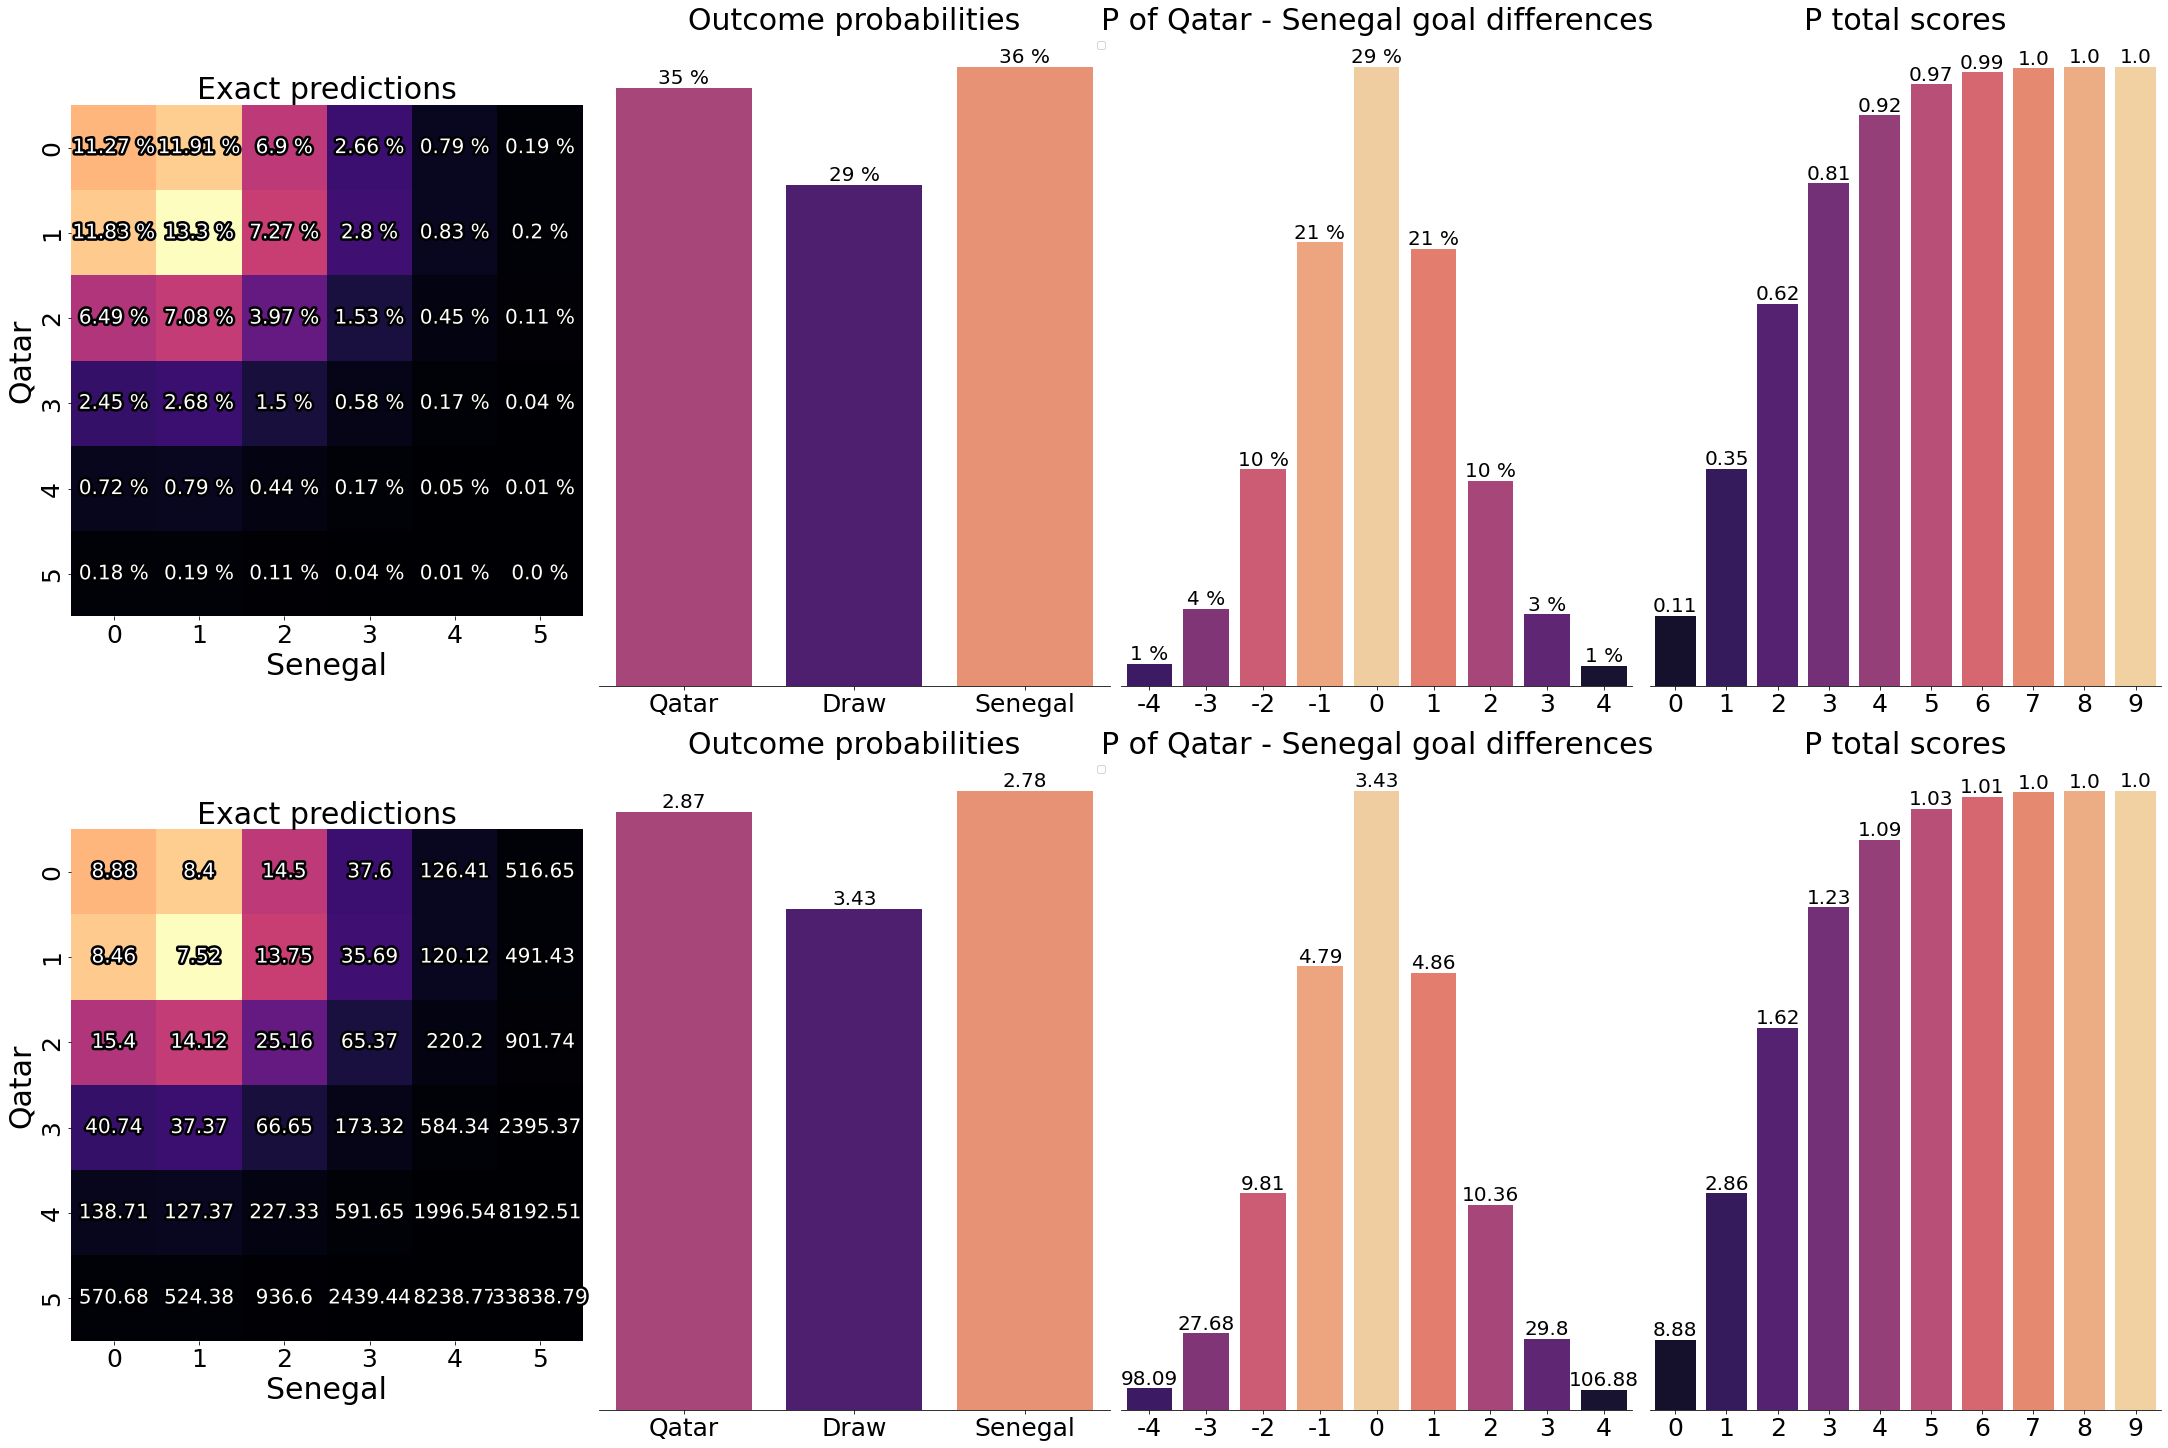

In [11]:
home_team = 'Qatar'
away_team = 'Senegal'
location = 'Qatar'
home_idx = country_to_idx(home_team, countries) - 1
away_idx = country_to_idx(away_team, countries) - 1
attack_home = chains['attack'][:, home_idx]
attack_away = chains['attack'][:, away_idx]
defense_home = chains['defense'][:, home_idx]
defense_away = chains['defense'][:, away_idx]
A = predict_outcomes_dixon_coles(attack_home, attack_away, defense_home, defense_away, intercept, home_advantage, rho, home_team, away_team, location)
#print(A.sum())
fig = plot_p_and_odds(A=A, home_team=home_team, away_team=away_team, cutoff=5)
fig.savefig('/tmp/' + home_team + '-' + away_team + '.png', facecolor='white', transparent=False)

/home/lukas/miniconda3/envs/bafeg_clean/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lukas/miniconda3/envs/bafeg_clean/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


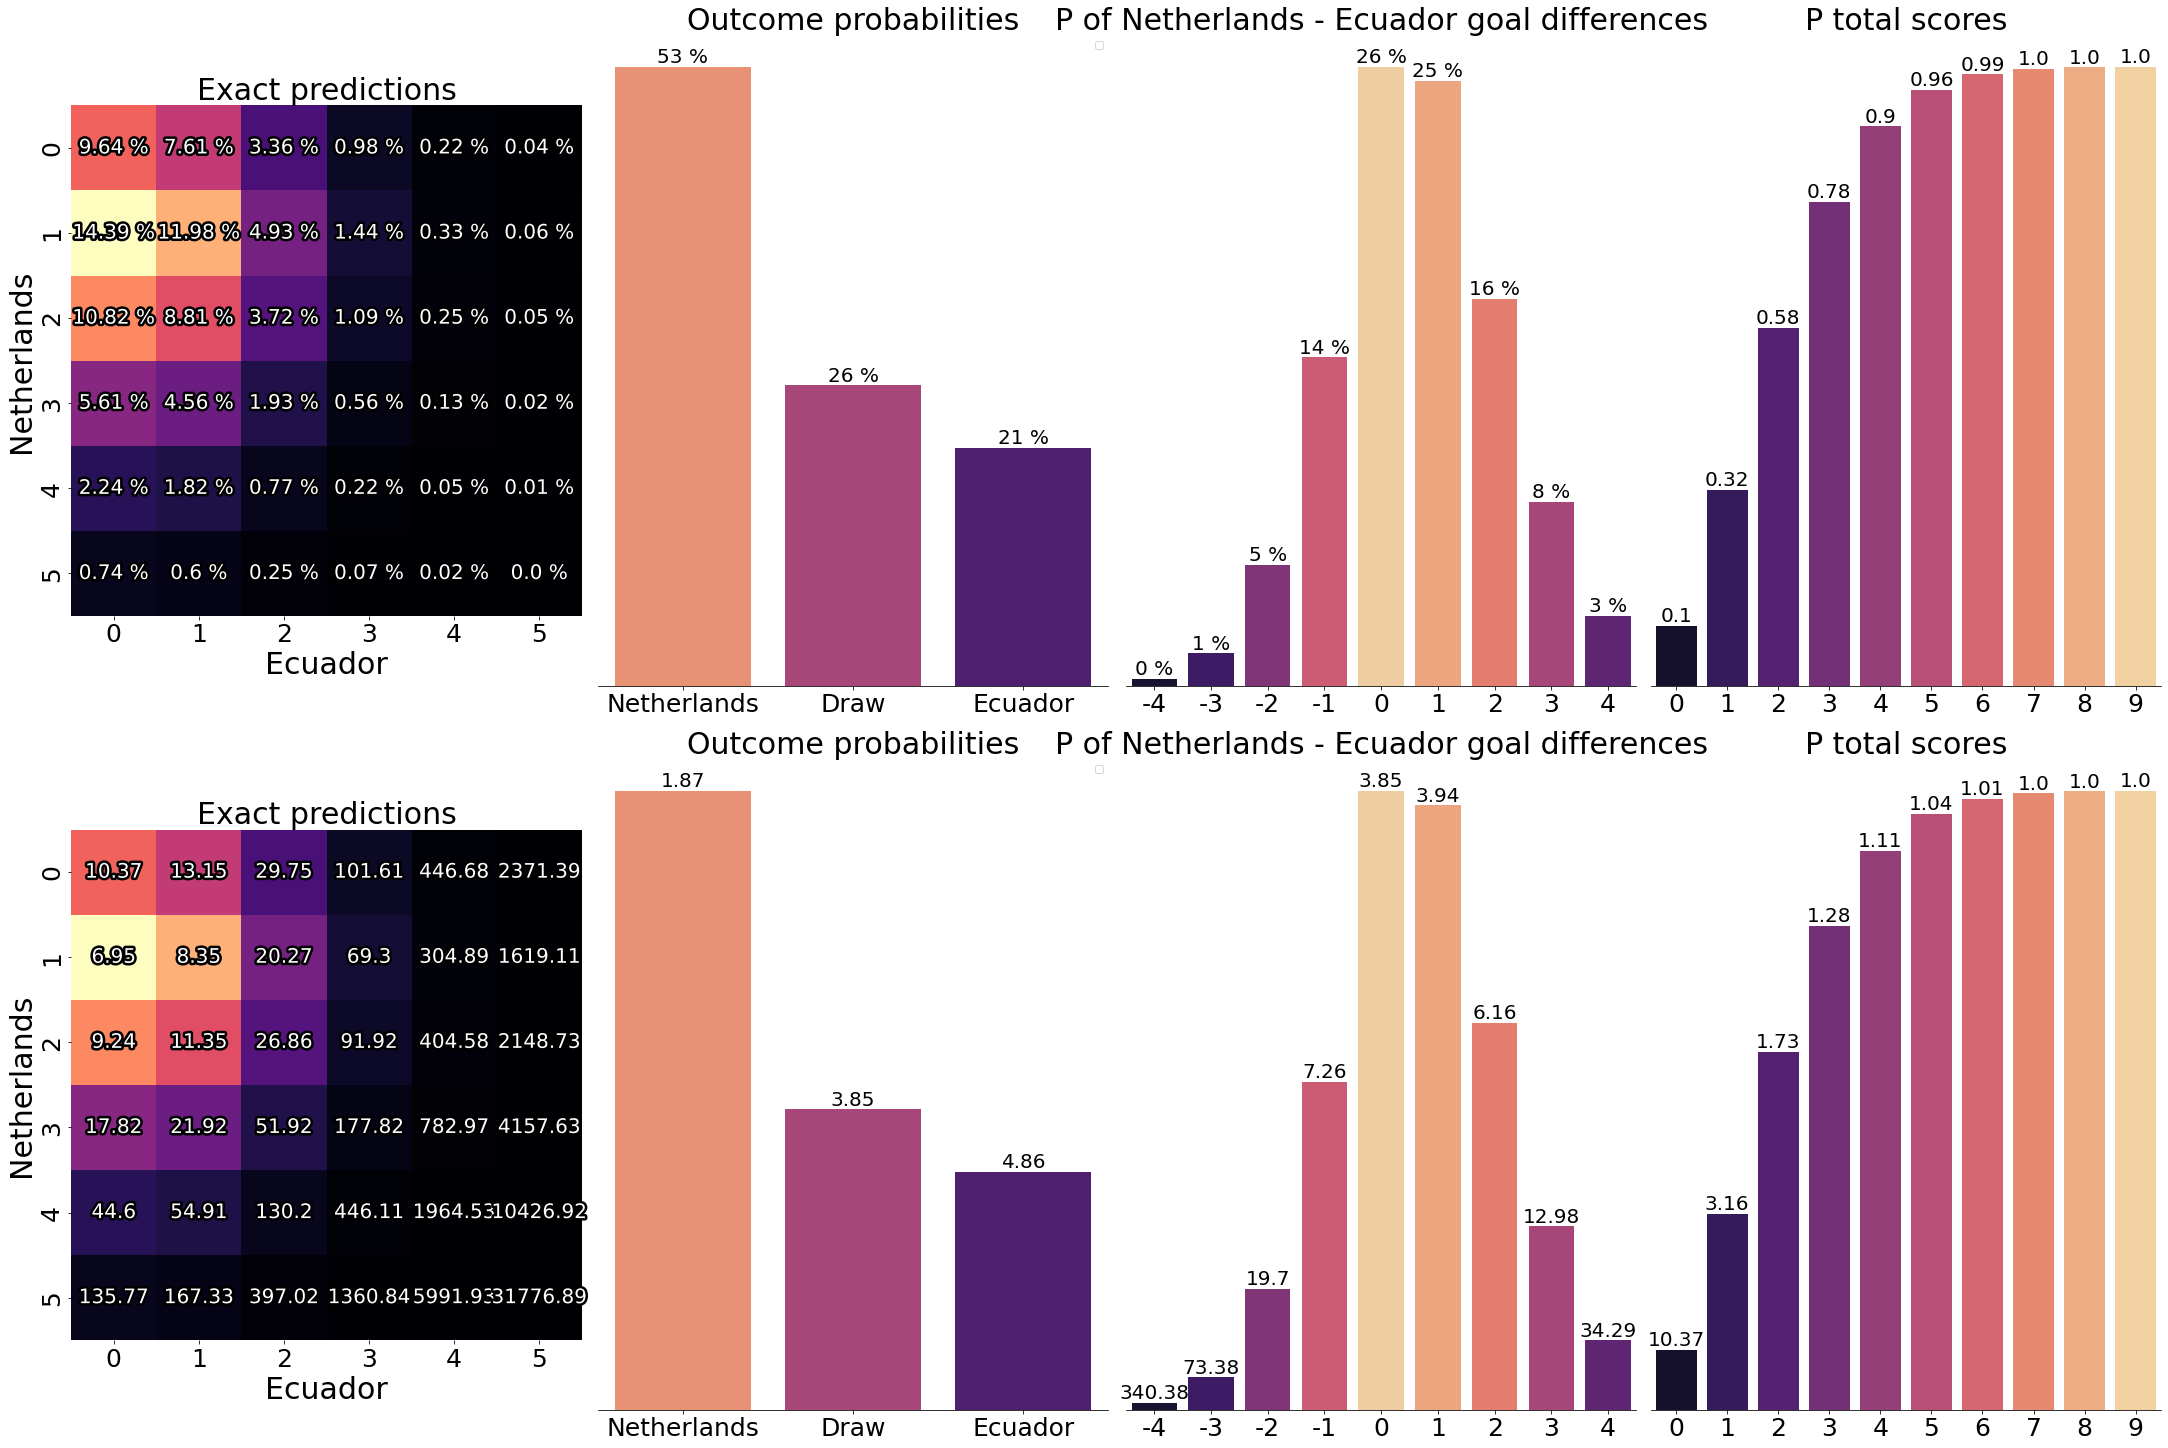

In [12]:
home_team = 'Netherlands'
away_team = 'Ecuador'
location = 'Qatar'
home_idx = country_to_idx(home_team, countries) - 1
away_idx = country_to_idx(away_team, countries) - 1
attack_home = chains['attack'][:, home_idx]
attack_away = chains['attack'][:, away_idx]
defense_home = chains['defense'][:, home_idx]
defense_away = chains['defense'][:, away_idx]
A = predict_outcomes_dixon_coles(attack_home, attack_away, defense_home, defense_away, intercept, home_advantage, rho, home_team, away_team, location)
#print(A.sum())
fig = plot_p_and_odds(A=A, home_team=home_team, away_team=away_team, cutoff=5)
fig.savefig('/tmp/' + home_team + '-' + away_team + '.png', facecolor='white', transparent=False)

/home/lukas/miniconda3/envs/bafeg_clean/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lukas/miniconda3/envs/bafeg_clean/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


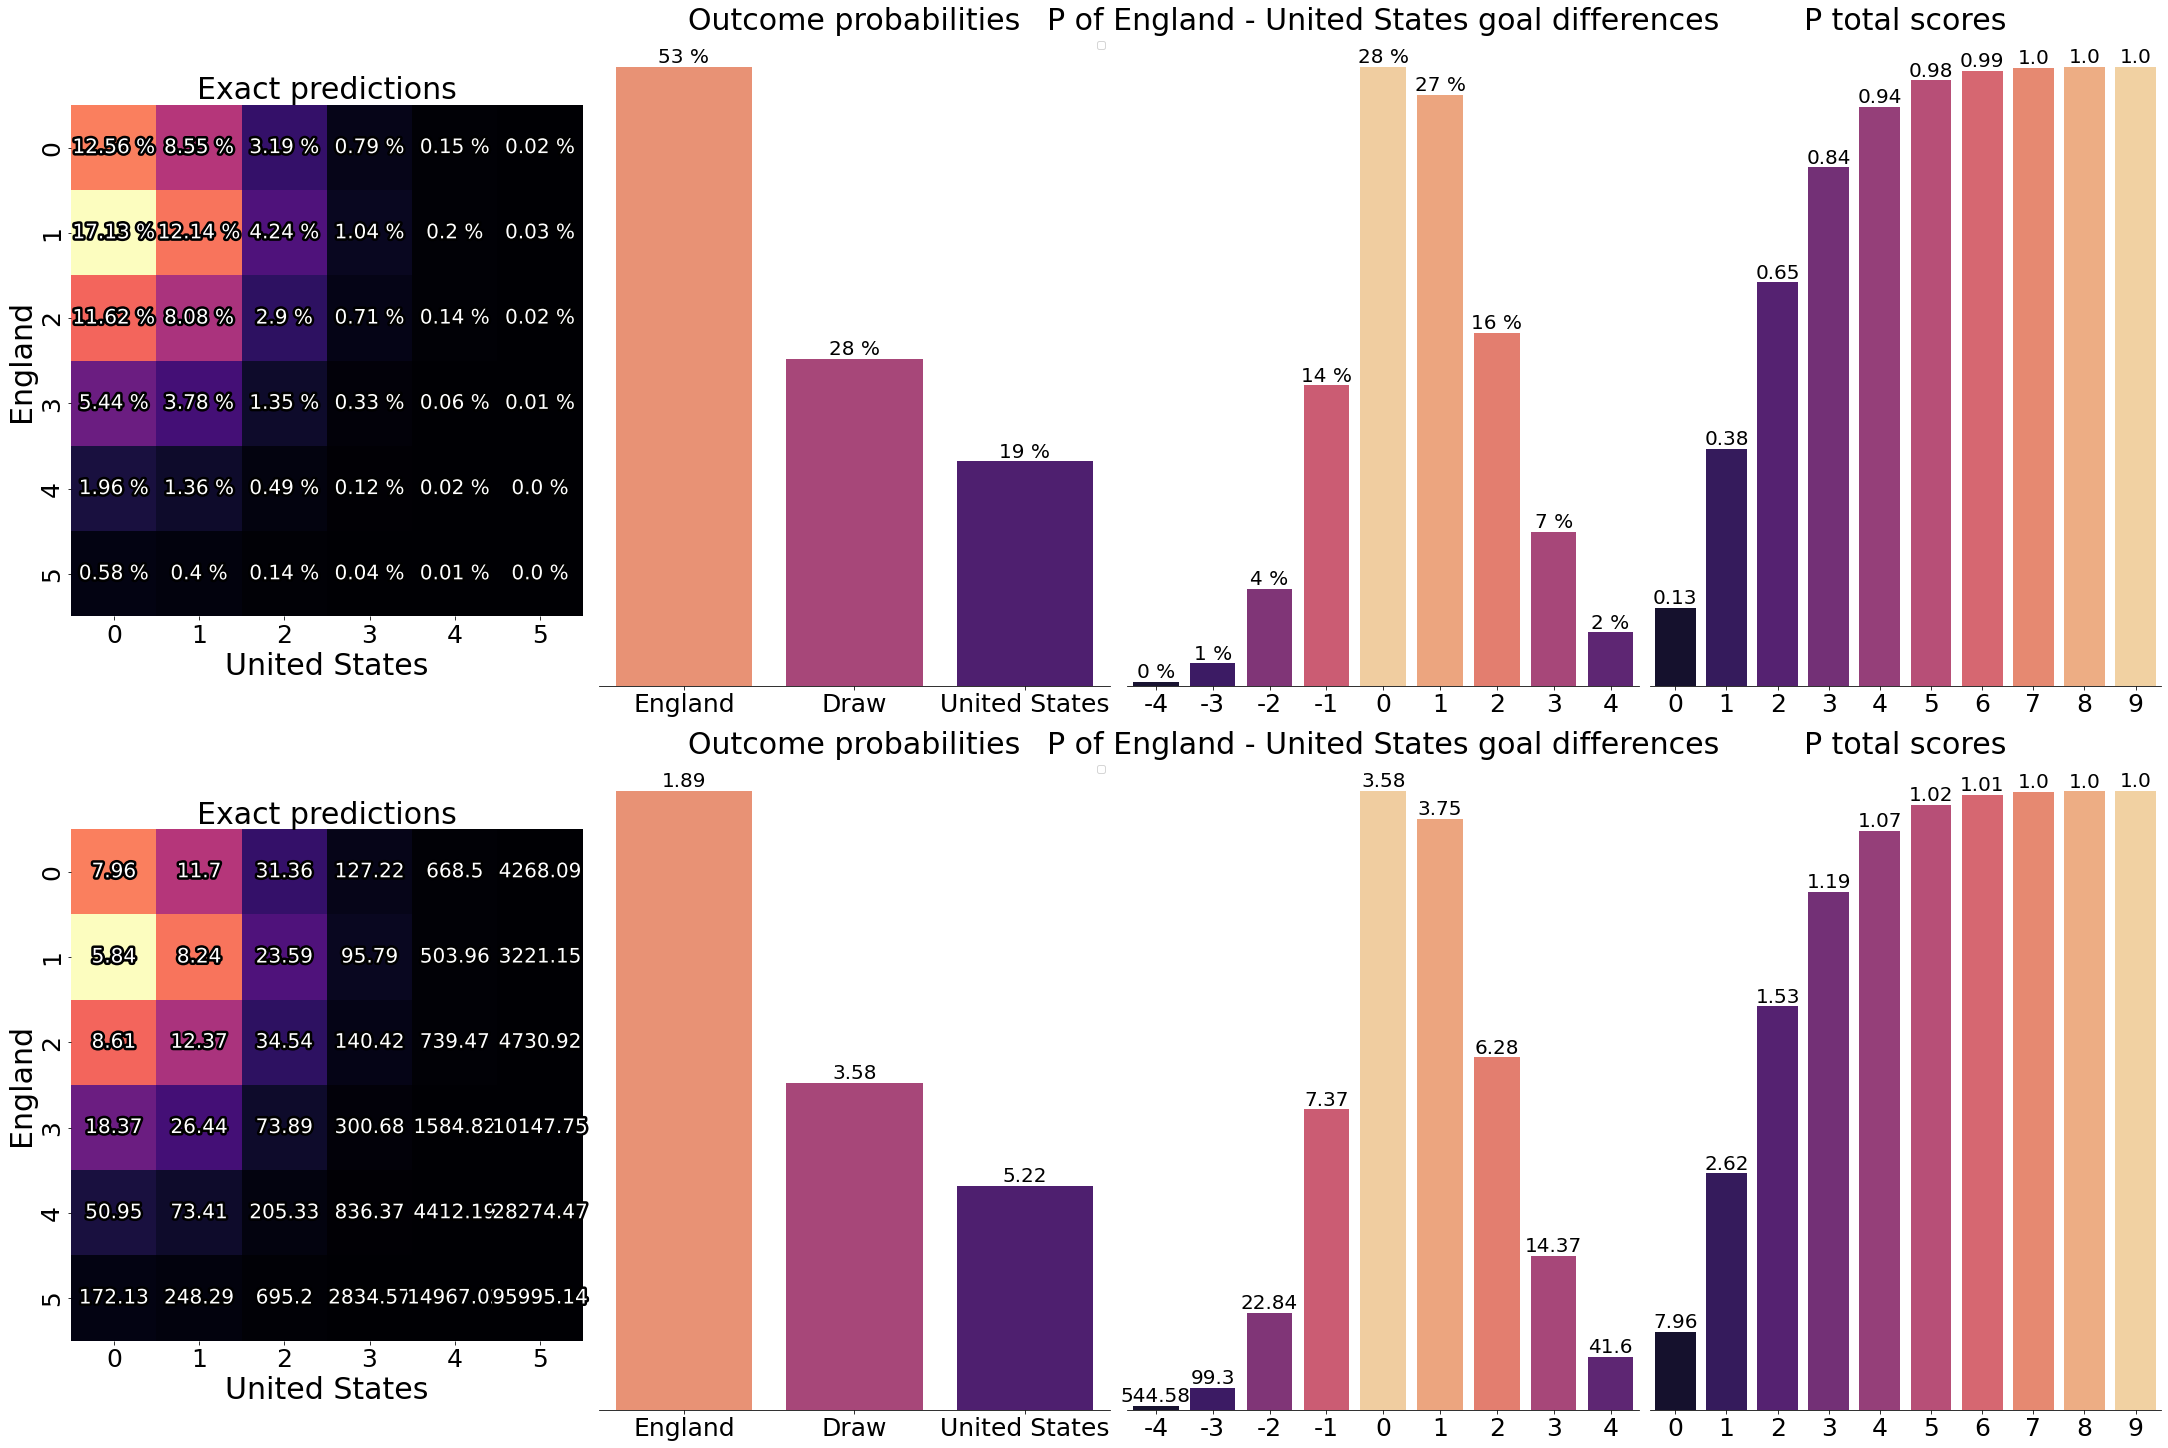

In [13]:
home_team = 'England'
away_team = 'United States'
location = 'Qatar'
home_idx = country_to_idx(home_team, countries) - 1
away_idx = country_to_idx(away_team, countries) - 1
attack_home = chains['attack'][:, home_idx]
attack_away = chains['attack'][:, away_idx]
defense_home = chains['defense'][:, home_idx]
defense_away = chains['defense'][:, away_idx]
A = predict_outcomes_dixon_coles(attack_home, attack_away, defense_home, defense_away, intercept, home_advantage, rho, home_team, away_team, location)
#print(A.sum())
fig = plot_p_and_odds(A=A, home_team=home_team, away_team=away_team, cutoff=5)
fig.savefig('/tmp/' + home_team + '-' + away_team + '.png', facecolor='white', transparent=False)

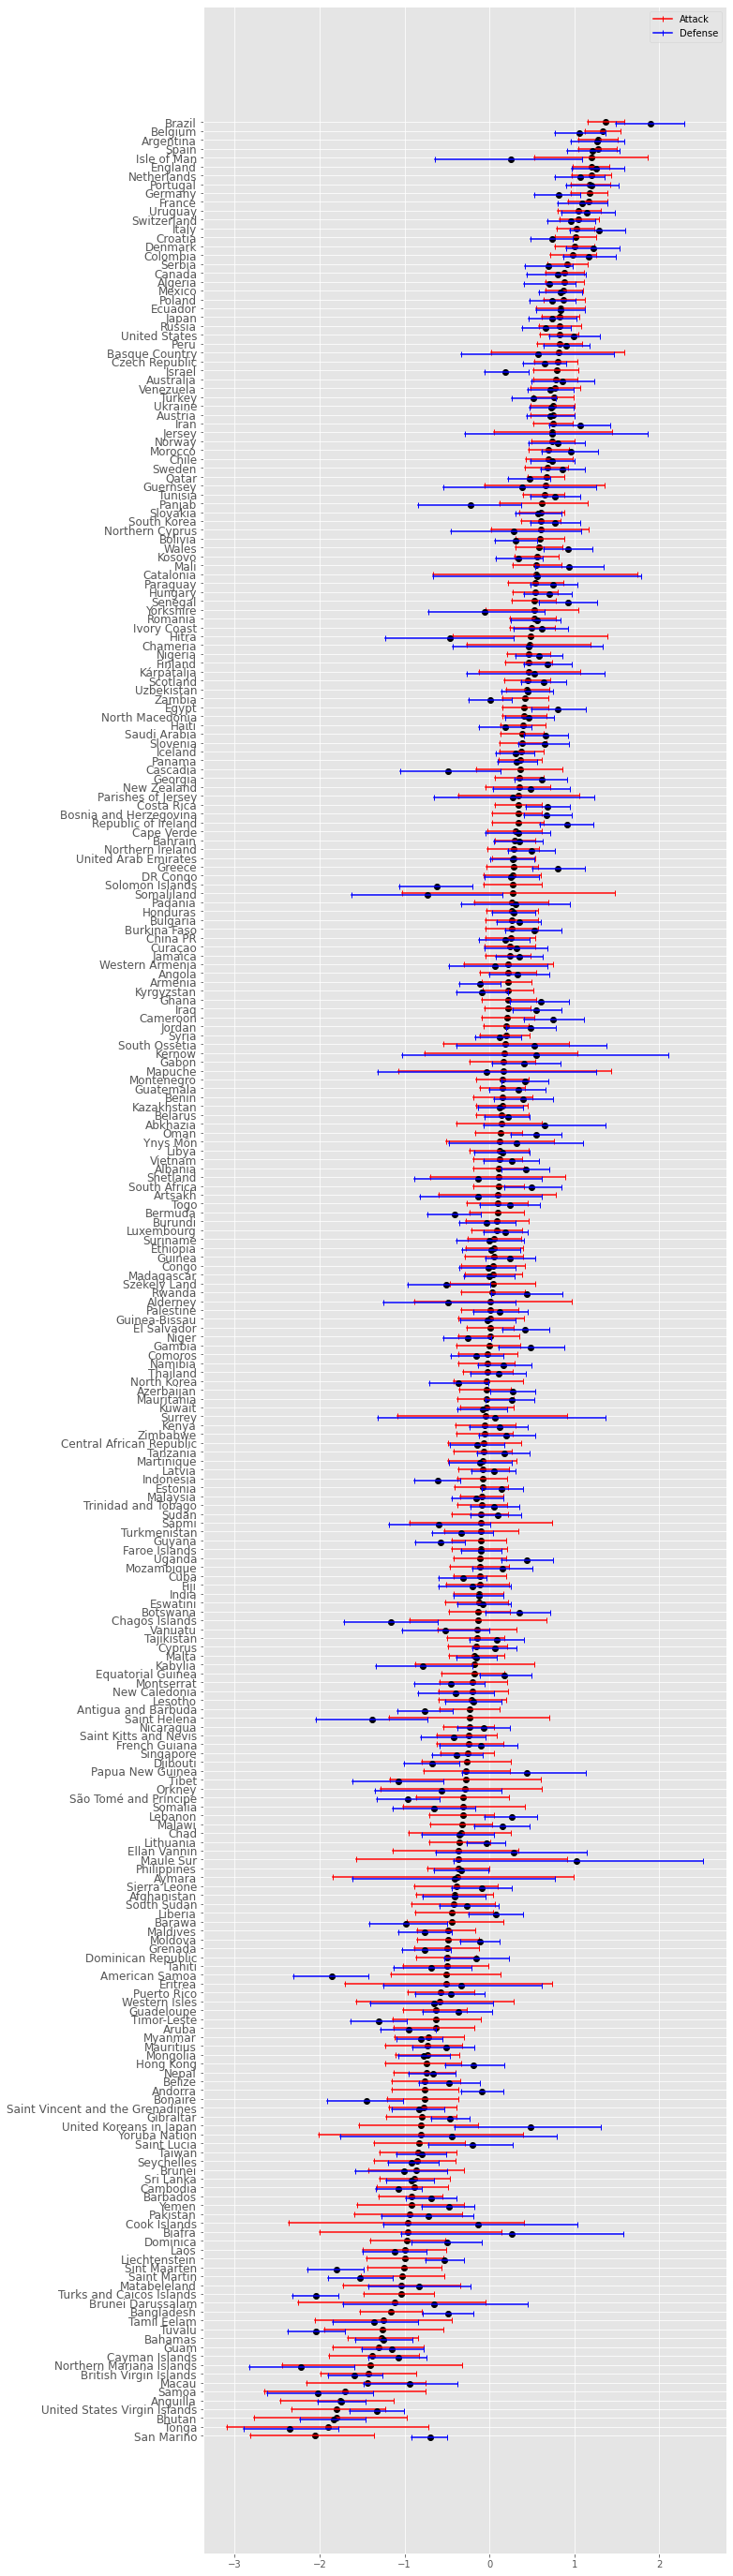

In [155]:
fig, ax = plt.subplots(figsize=(10, 50))
for i, key in enumerate(attack_means.keys()):
    ax.plot(attacks[key].mean(), i, 'ko')
    a, = ax.plot(hdi(attacks[key]), [i, i], 'r|-')
    ax.plot(defenses[key].mean(), i - .2, 'ko')
    b, = ax.plot(hdi(defenses[key]), [i - .2, i - .2], 'b|-')
ax.legend([a, b], ['Attack', 'Defense'])
ax.set_yticks(np.arange(len(countries)), attack_means.keys(), fontsize=12);
fig.savefig('/tmp/strengths.png', bbox_inches='tight')

In [15]:
from bafeg_clean.mcmc_pystan import load_stanfit

In [17]:
file = '/home/data/bafeg_clean/stan_fits/rsa_regression/left_MFG/fit_both_change.nc'
rsa = load_stanfit(file)

In [21]:
rsa.posterior.std()

<xarray.Dataset>
Dimensions:          ()
Data variables: (12/27)
    emo_b0           float64 0.008703
    emo_b1           float64 0.002947
    id_b0            float64 0.008066
    id_b1            float64 0.002926
    std_emo_b0       float64 0.00685
    std_emo_b1       float64 0.002484
    ...               ...
    cond_emo_b0      float64 0.02791
    cond_emo_b1      float64 0.005972
    cond_id_b0       float64 0.01587
    cond_id_b1       float64 0.006245
    emo_minus_id_b0  float64 0.01189
    emo_minus_id_b1  float64 0.004154

/home/lukas/miniconda3/envs/bafeg_clean/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lukas/miniconda3/envs/bafeg_clean/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


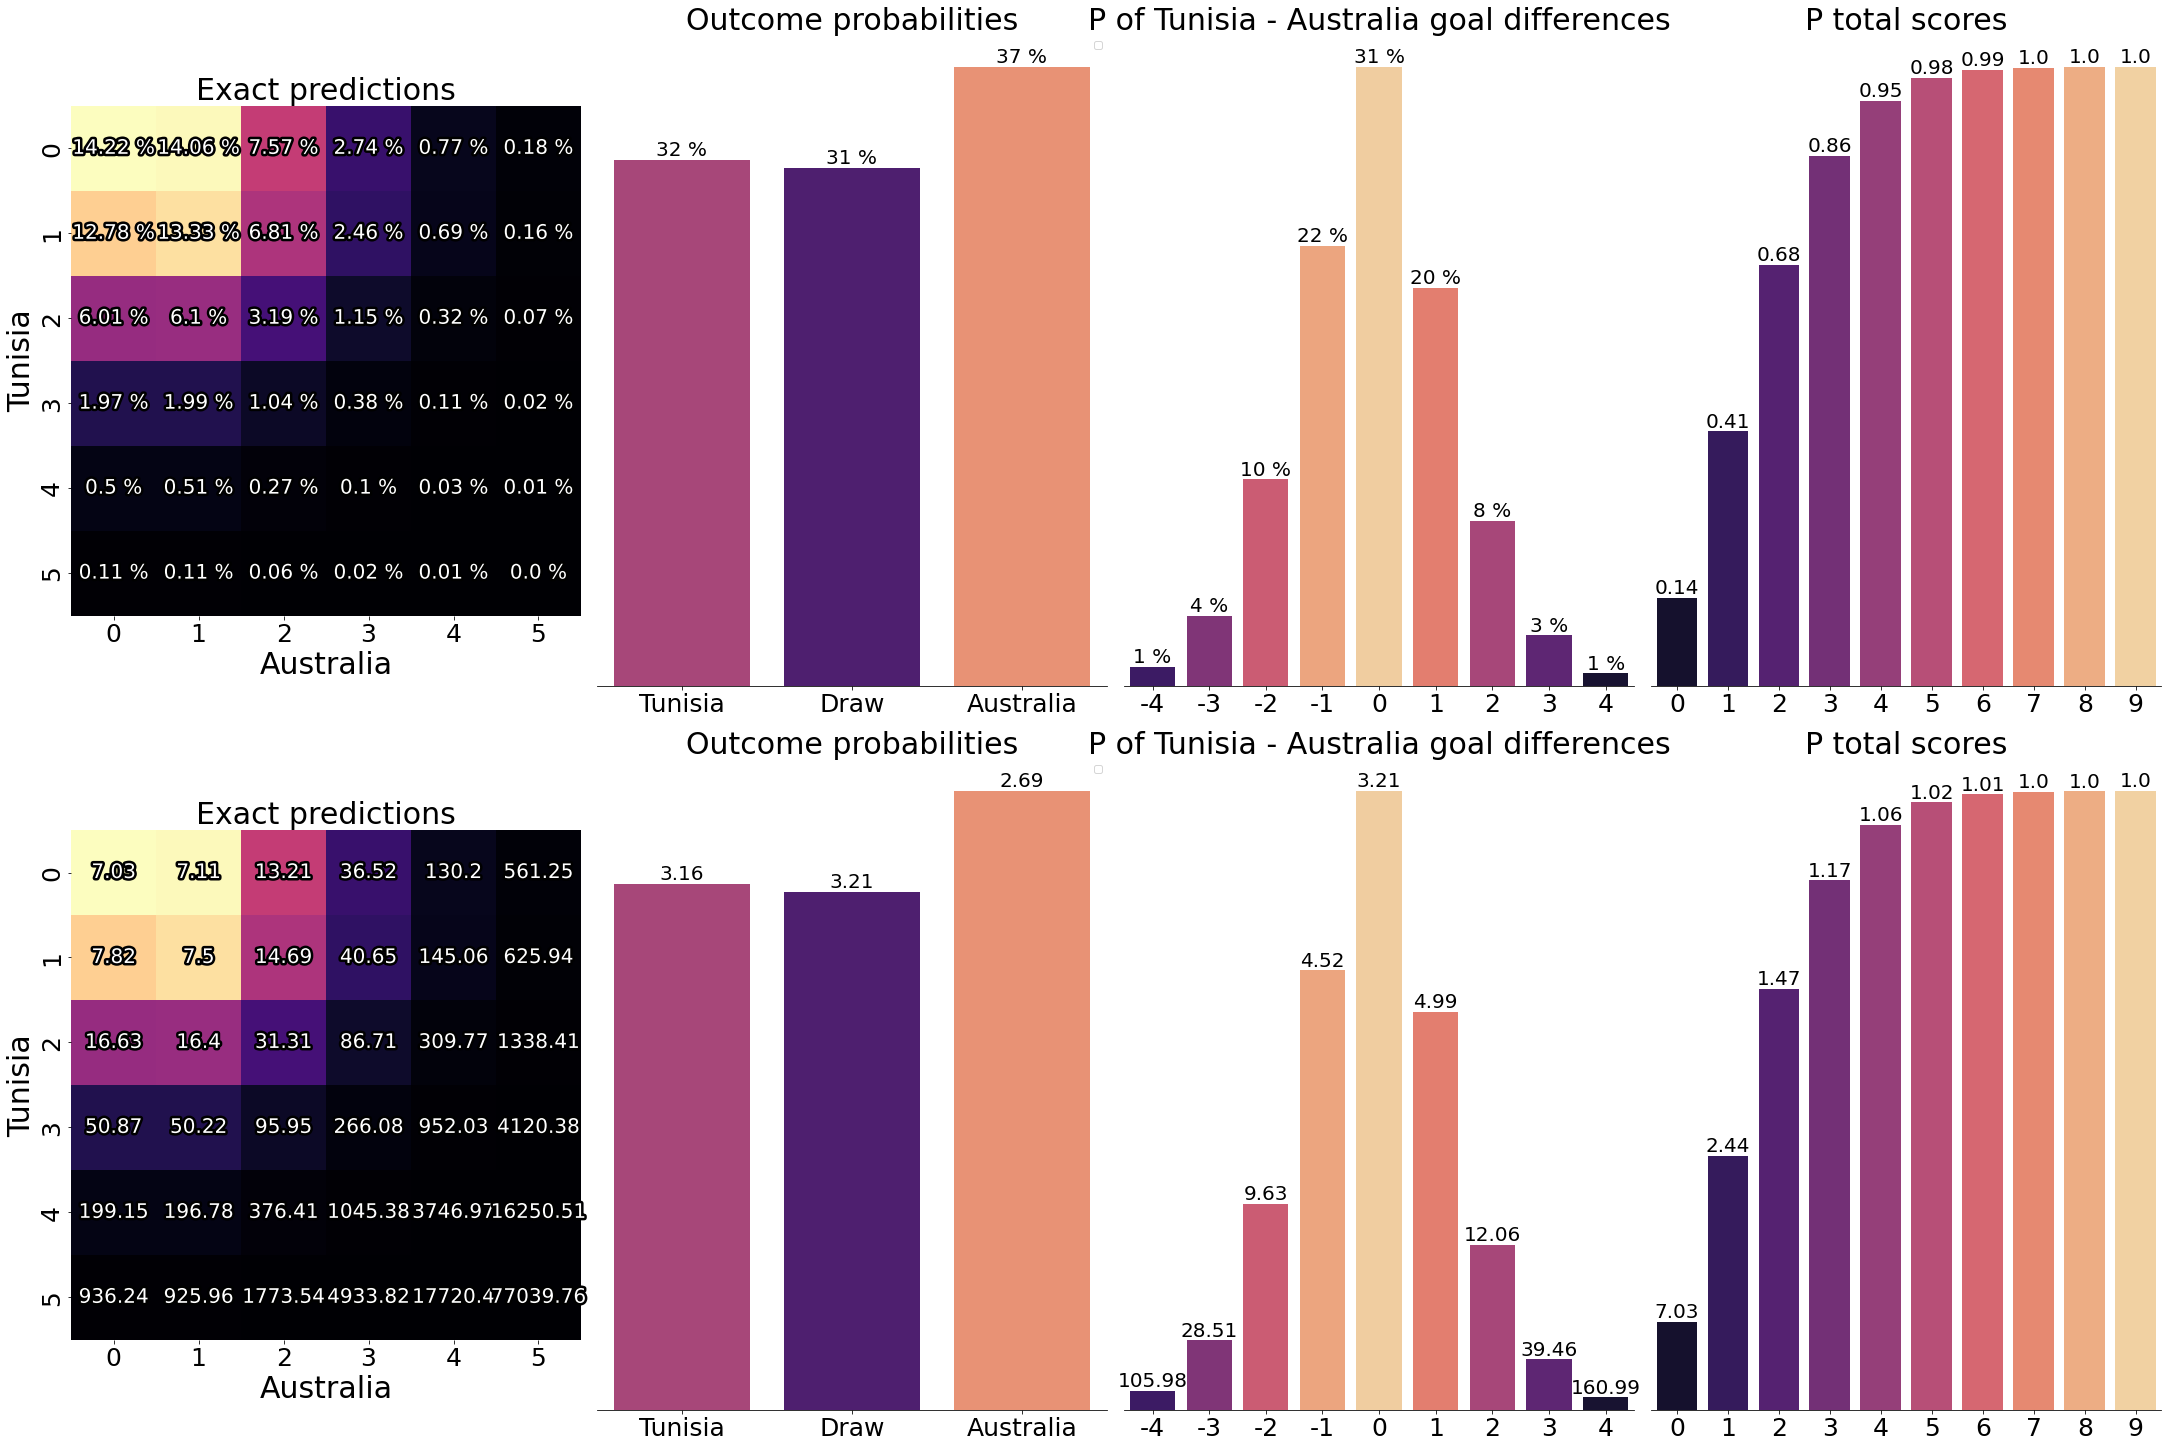

In [22]:
home_team = 'Tunisia'
away_team = 'Australia'
location = 'Qatar'
home_idx = country_to_idx(home_team, countries) - 1
away_idx = country_to_idx(away_team, countries) - 1
attack_home = chains['attack'][:, home_idx]
attack_away = chains['attack'][:, away_idx]
defense_home = chains['defense'][:, home_idx]
defense_away = chains['defense'][:, away_idx]
A = predict_outcomes_dixon_coles(attack_home, attack_away, defense_home, defense_away, intercept, home_advantage, rho, home_team, away_team, location)
#print(A.sum())
fig = plot_p_and_odds(A=A, home_team=home_team, away_team=away_team, cutoff=5)
fig.savefig('/tmp/' + home_team + '-' + away_team + '.png', facecolor='white', transparent=False)

/home/lukas/miniconda3/envs/bafeg_clean/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lukas/miniconda3/envs/bafeg_clean/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


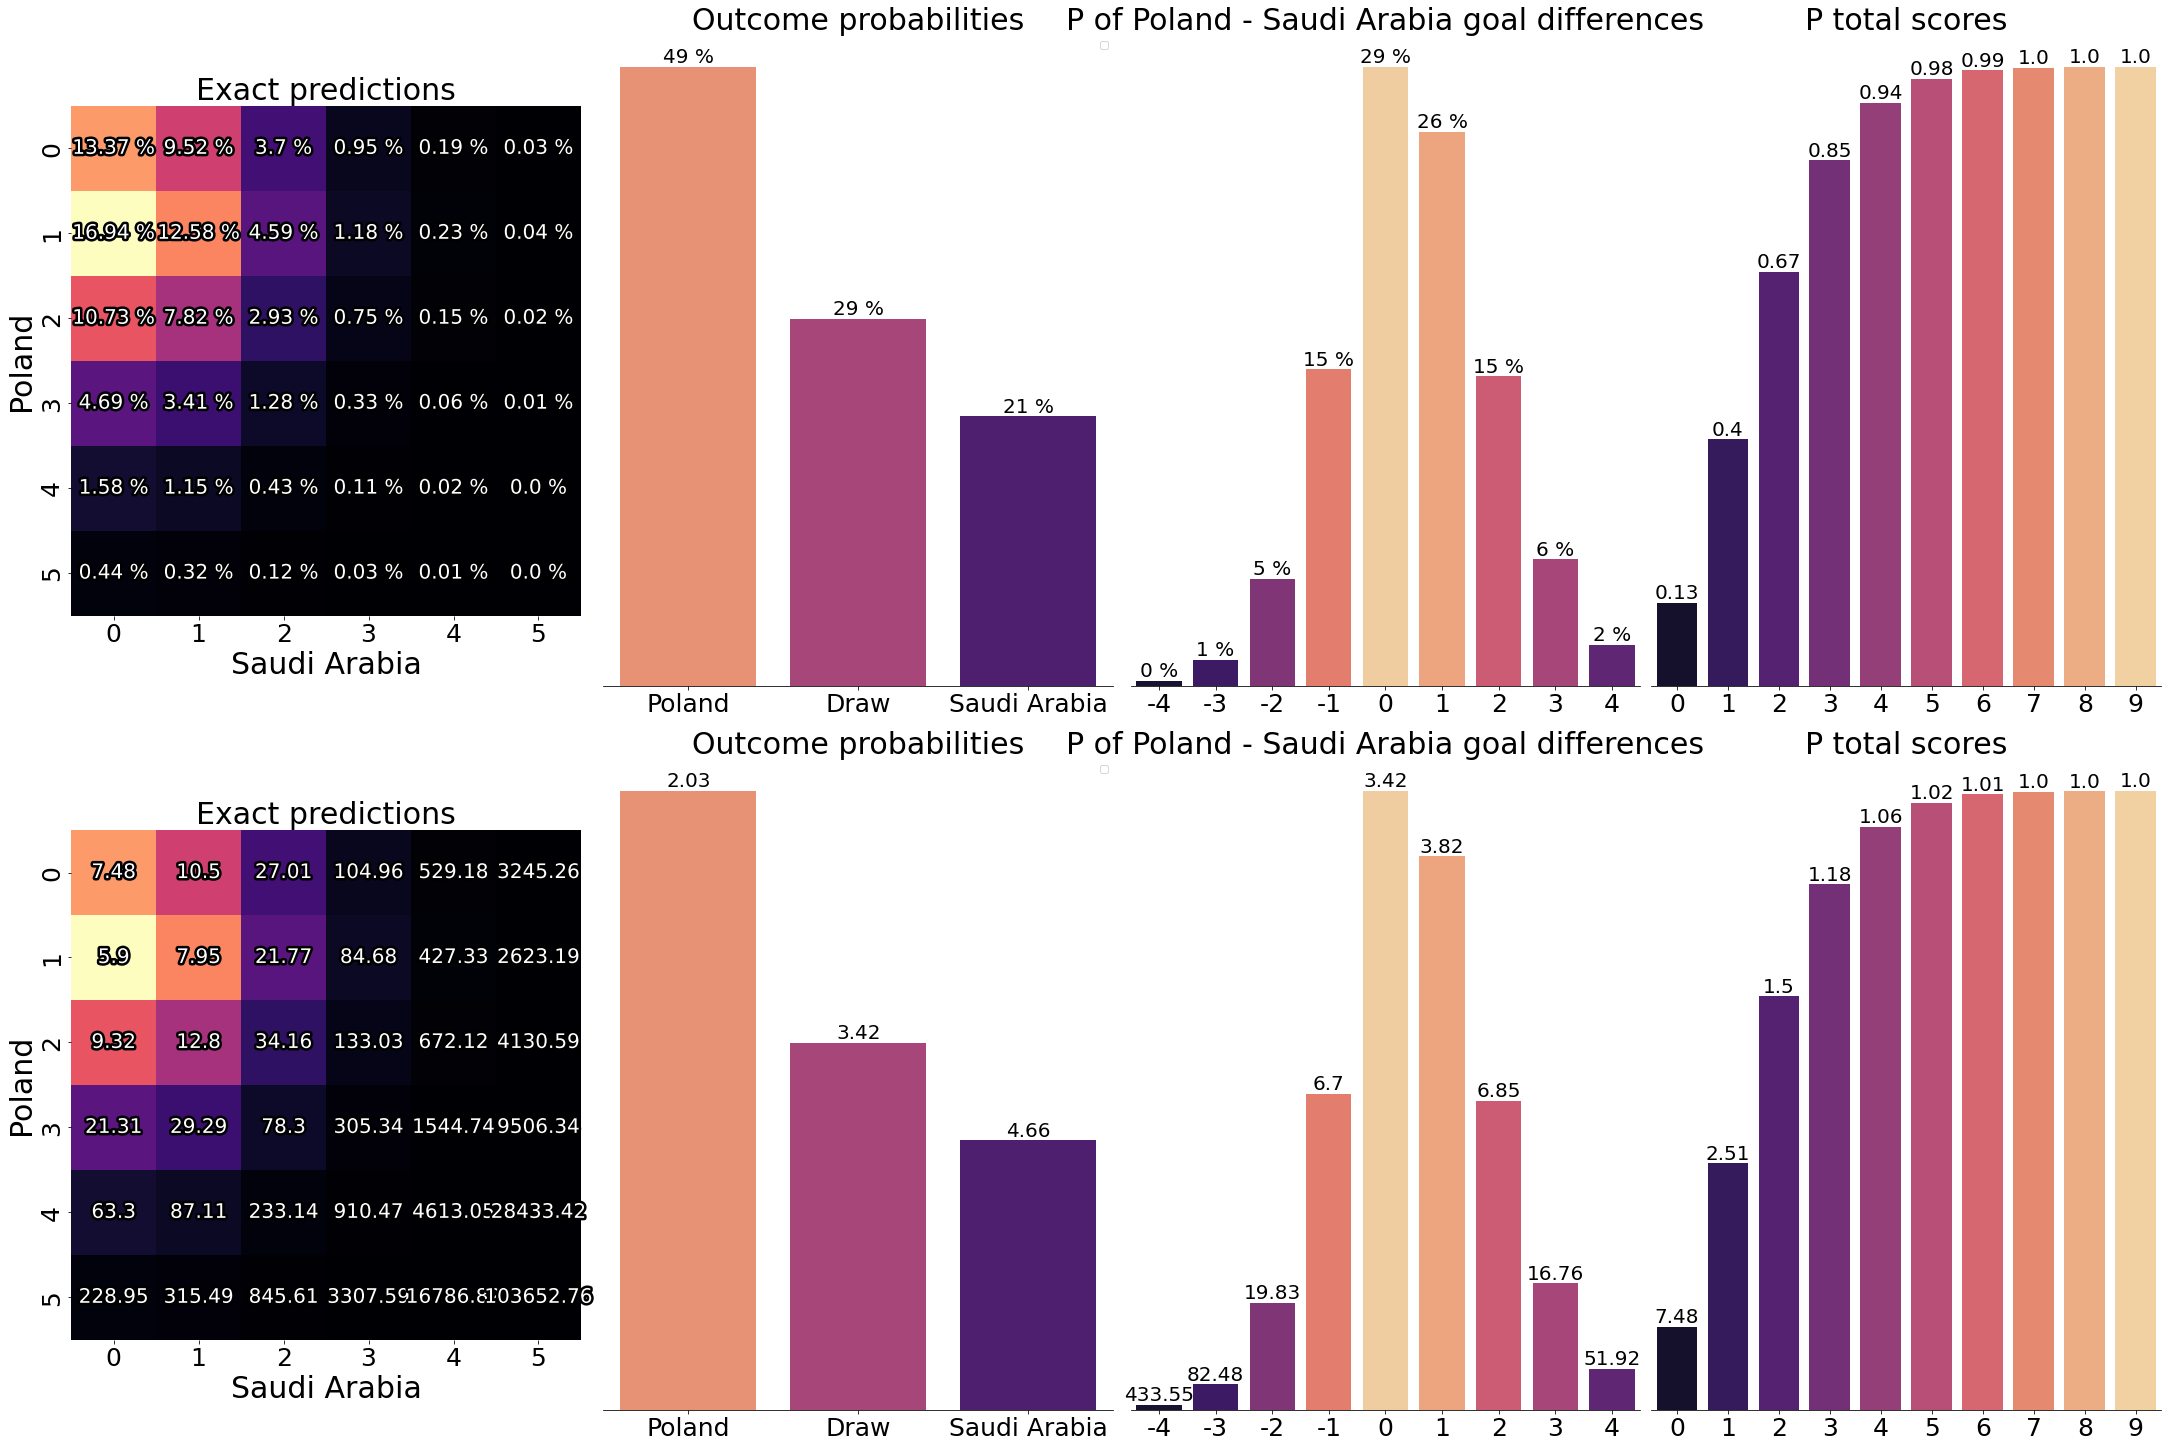

In [23]:
home_team = 'Poland'
away_team = 'Saudi Arabia'
location = 'Qatar'
home_idx = country_to_idx(home_team, countries) - 1
away_idx = country_to_idx(away_team, countries) - 1
attack_home = chains['attack'][:, home_idx]
attack_away = chains['attack'][:, away_idx]
defense_home = chains['defense'][:, home_idx]
defense_away = chains['defense'][:, away_idx]
A = predict_outcomes_dixon_coles(attack_home, attack_away, defense_home, defense_away, intercept, home_advantage, rho, home_team, away_team, location)
#print(A.sum())
fig = plot_p_and_odds(A=A, home_team=home_team, away_team=away_team, cutoff=5)
fig.savefig('/tmp/' + home_team + '-' + away_team + '.png', facecolor='white', transparent=False)

/home/lukas/miniconda3/envs/bafeg_clean/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lukas/miniconda3/envs/bafeg_clean/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


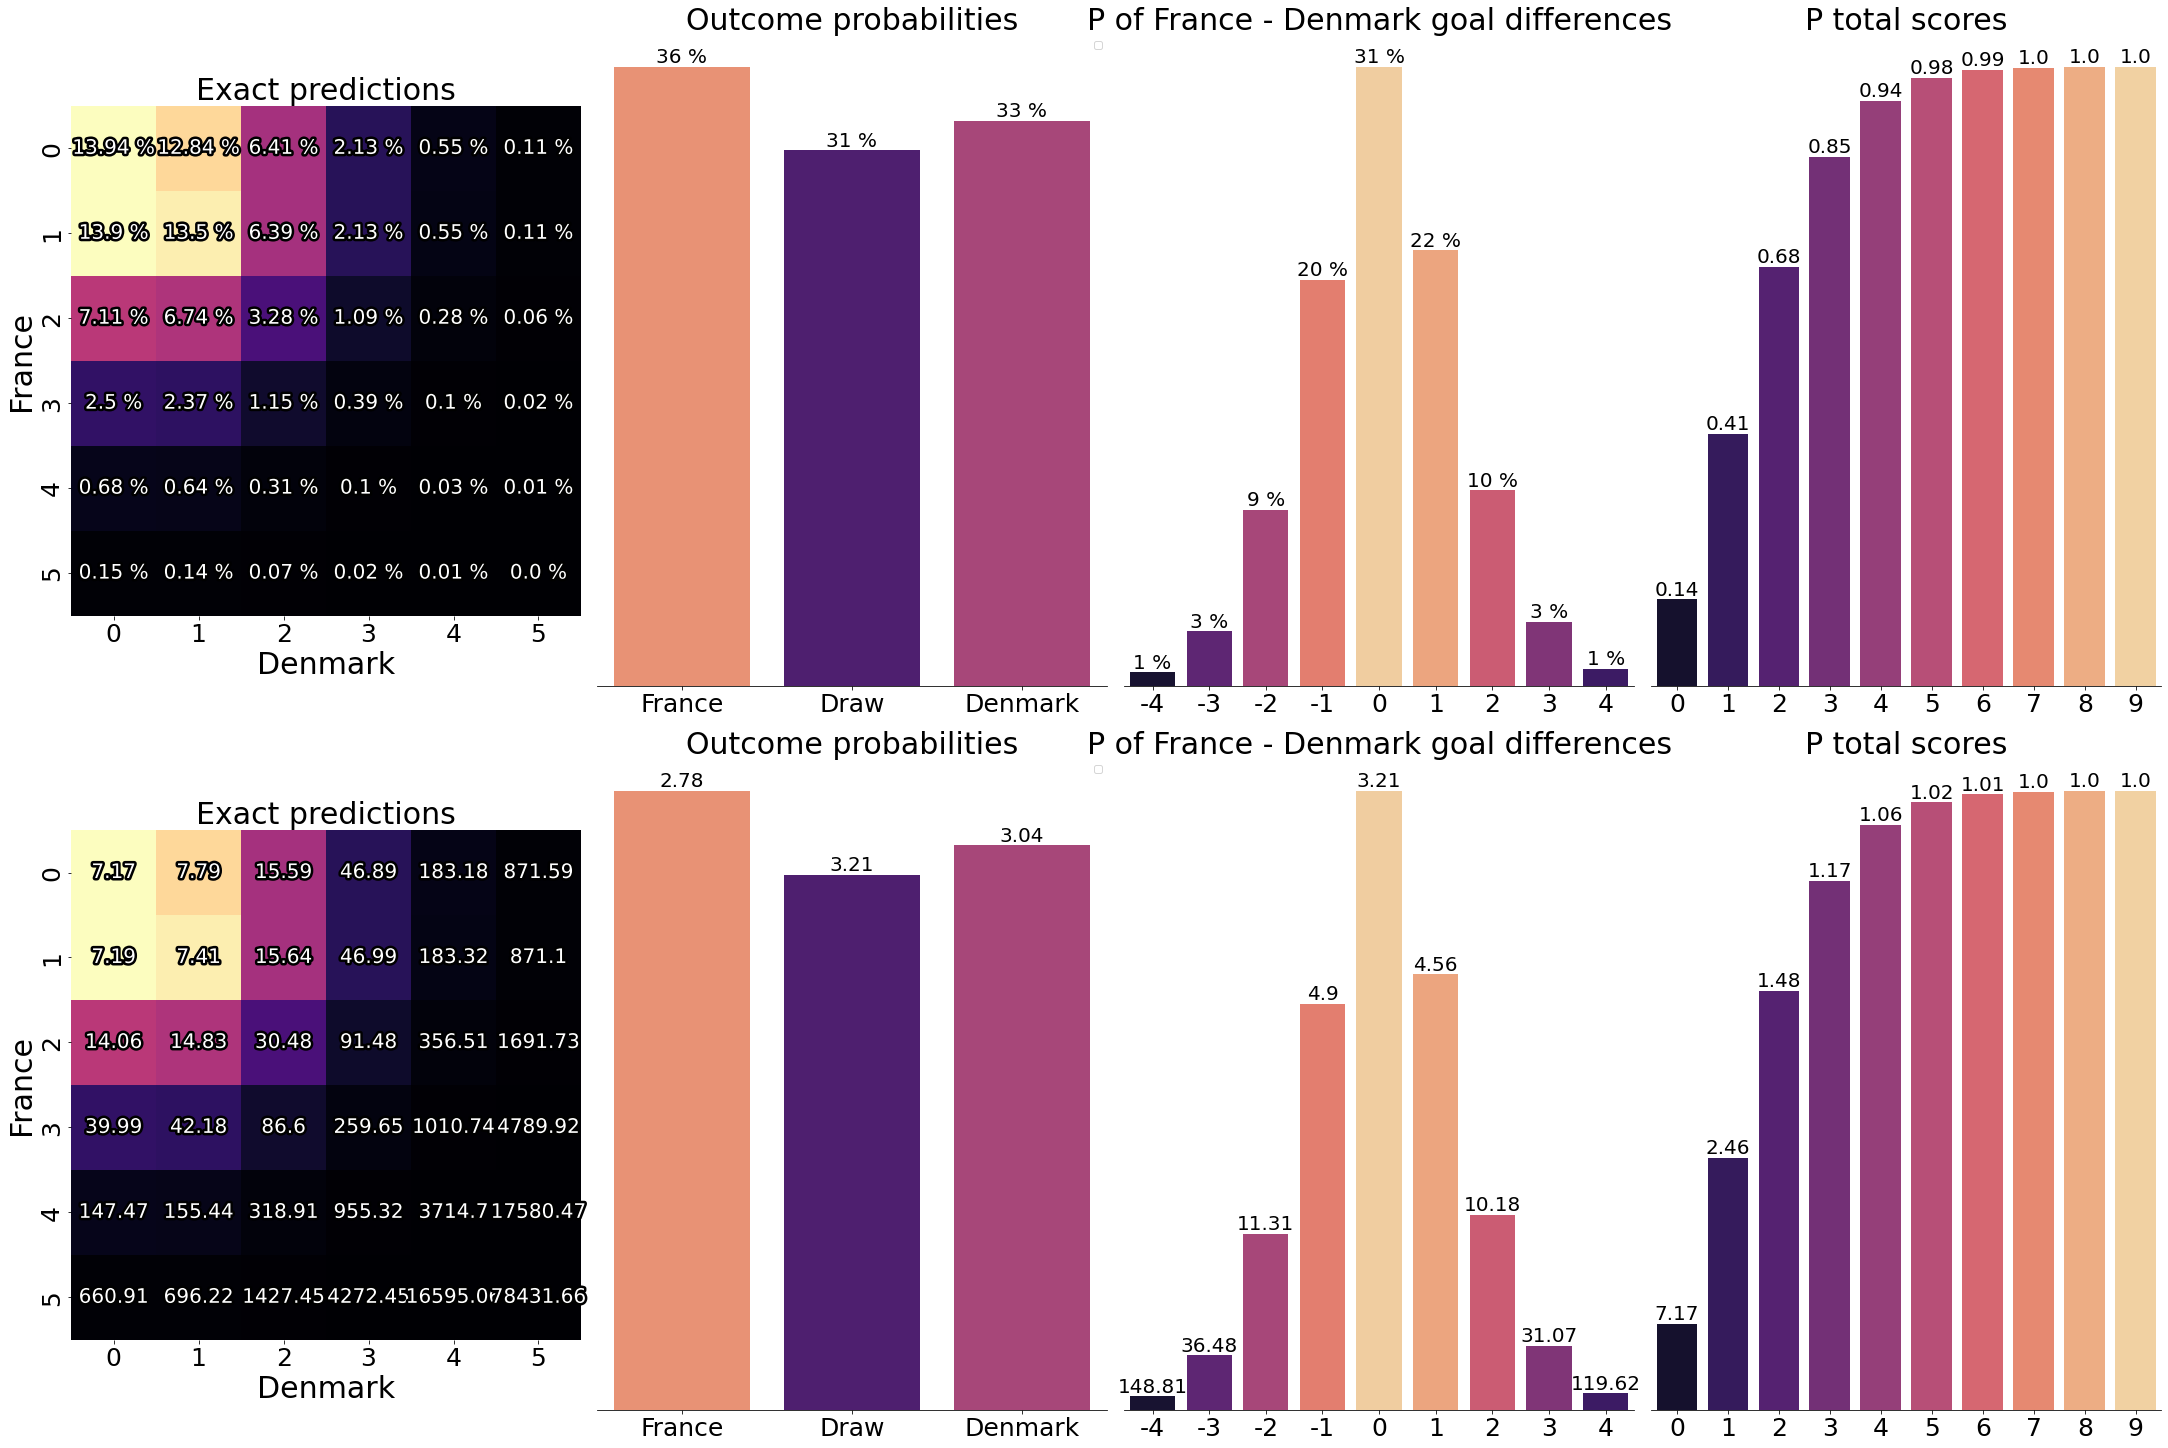

In [24]:
home_team = 'France'
away_team = 'Denmark'
location = 'Qatar'
home_idx = country_to_idx(home_team, countries) - 1
away_idx = country_to_idx(away_team, countries) - 1
attack_home = chains['attack'][:, home_idx]
attack_away = chains['attack'][:, away_idx]
defense_home = chains['defense'][:, home_idx]
defense_away = chains['defense'][:, away_idx]
A = predict_outcomes_dixon_coles(attack_home, attack_away, defense_home, defense_away, intercept, home_advantage, rho, home_team, away_team, location)
#print(A.sum())
fig = plot_p_and_odds(A=A, home_team=home_team, away_team=away_team, cutoff=5)
fig.savefig('/tmp/' + home_team + '-' + away_team + '.png', facecolor='white', transparent=False)

/home/lukas/miniconda3/envs/bafeg_clean/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lukas/miniconda3/envs/bafeg_clean/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


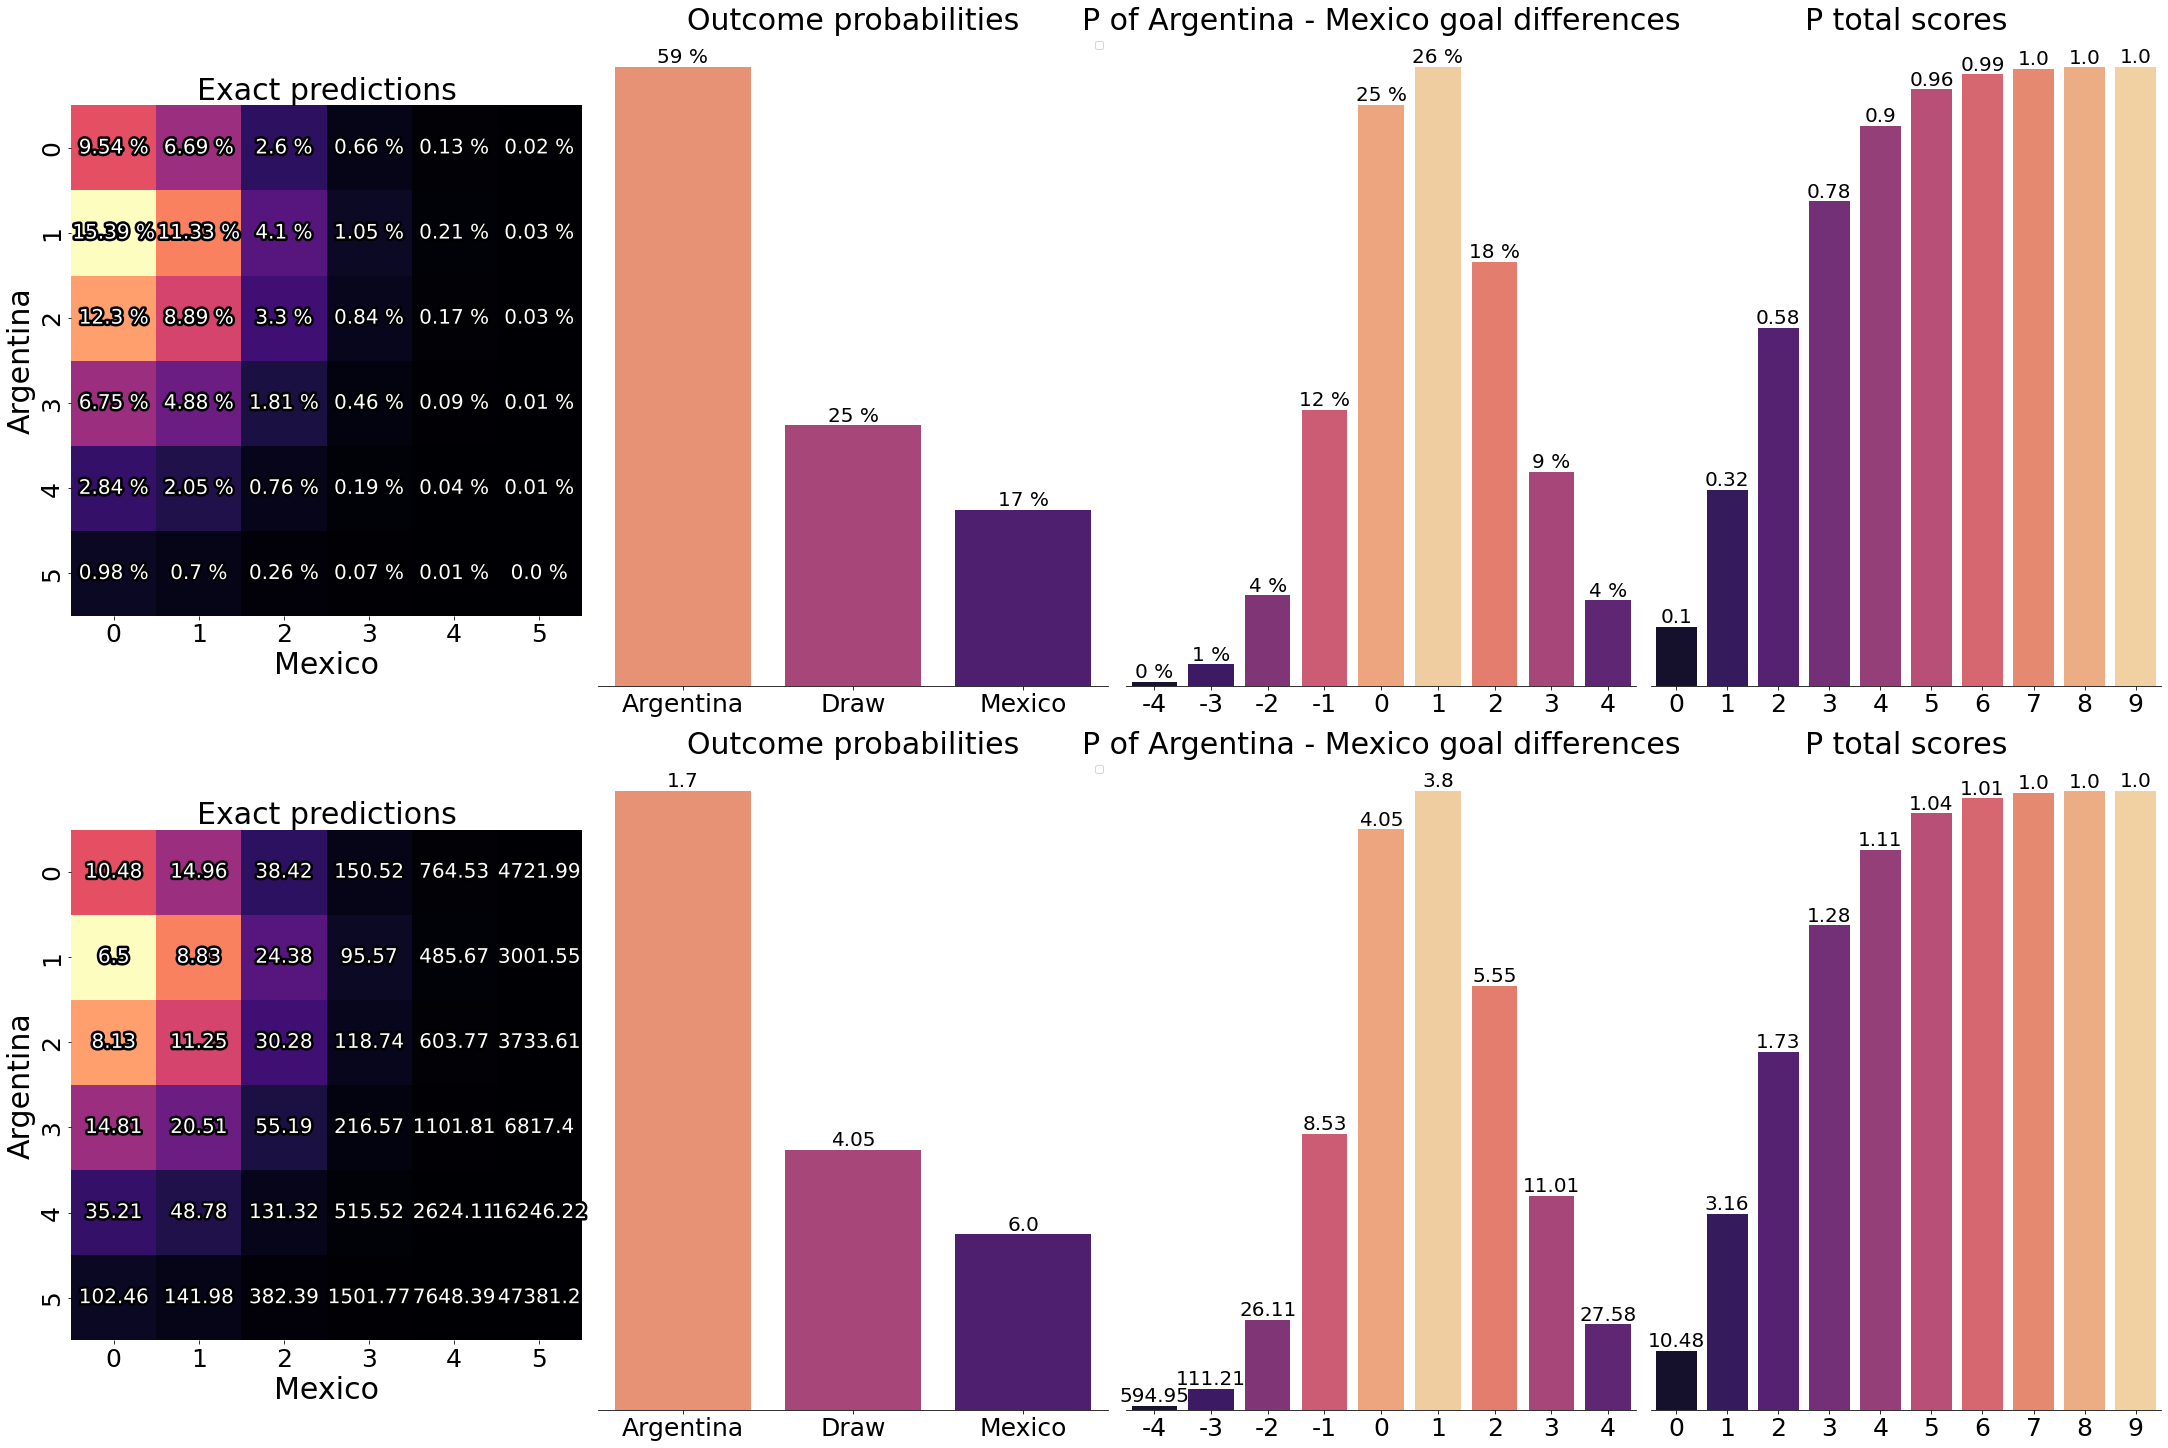

In [25]:
home_team = 'Argentina'
away_team = 'Mexico'
location = 'Qatar'
home_idx = country_to_idx(home_team, countries) - 1
away_idx = country_to_idx(away_team, countries) - 1
attack_home = chains['attack'][:, home_idx]
attack_away = chains['attack'][:, away_idx]
defense_home = chains['defense'][:, home_idx]
defense_away = chains['defense'][:, away_idx]
A = predict_outcomes_dixon_coles(attack_home, attack_away, defense_home, defense_away, intercept, home_advantage, rho, home_team, away_team, location)
#print(A.sum())
fig = plot_p_and_odds(A=A, home_team=home_team, away_team=away_team, cutoff=5)
fig.savefig('/tmp/' + home_team + '-' + away_team + '.png', facecolor='white', transparent=False)